# Medical Cost - Regression using PyTorch


This is the [link](https://www.kaggle.com/datasets/mirichoi0218/insurance) for the dataset that I've used.

In [1]:
import pandas as pd

In [2]:
## Reading the data
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
## General information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
## Shape of dataset, so we could know the number of samples and also features
df.shape

(1338, 7)

In [6]:
## Find non-numerical columns, in order to encode them as numerical values
df.select_dtypes(include='object')

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [7]:
## We use pandas to convert categorical columns to one-hot
from sklearn.preprocessing import OneHotEncoder

df_transformed = pd.get_dummies(data=df)
target_idx = df_transformed.columns.get_loc(key='charges')
## Change the order of column and put target as the last one
ordered_columns = list(df_transformed.columns[:target_idx]) + list(df_transformed.columns[target_idx+1:]) + ['charges']
df_transformed = df_transformed.loc[:, ordered_columns]
df_transformed

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,1,0,0,1,0,0,0,1,16884.92400
1,18,33.770,1,0,1,1,0,0,0,1,0,1725.55230
2,28,33.000,3,0,1,1,0,0,0,1,0,4449.46200
3,33,22.705,0,0,1,1,0,0,1,0,0,21984.47061
4,32,28.880,0,0,1,1,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0,10600.54830
1334,18,31.920,0,1,0,1,0,1,0,0,0,2205.98080
1335,18,36.850,0,1,0,1,0,0,0,1,0,1629.83350
1336,21,25.800,0,1,0,1,0,0,0,0,1,2007.94500


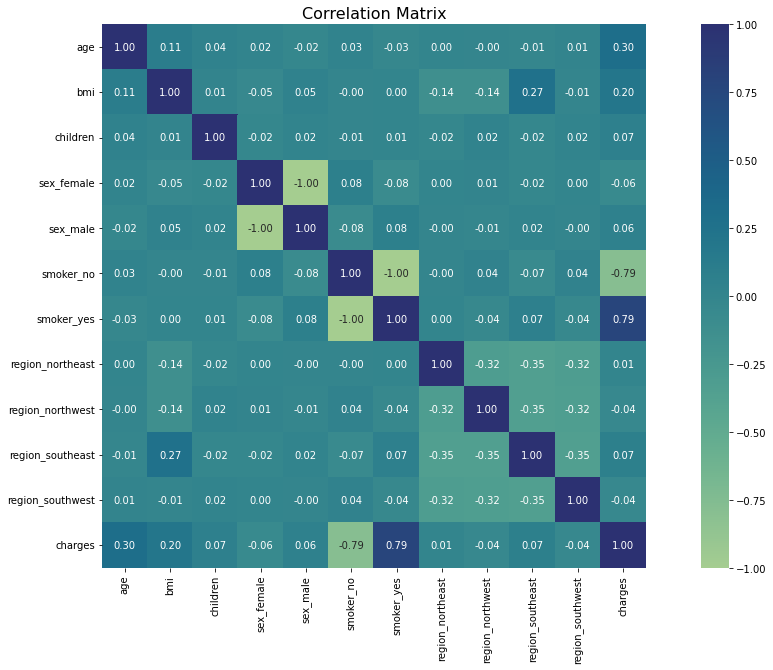

In [8]:
## We use seaborn to plot the heatmap correlations between features
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_transformed.corr()  #Defining a corrolation variavle (Corrolation Matrix)
plt.figure(figsize=(20,10))   
sns.heatmap(corr, annot=True, cmap='crest', cbar=True, fmt='.2f', square=True)

# Adding title
plt.title('Correlation Matrix', fontsize=16)

plt.show()

In [9]:
## Creating training and test dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(df_transformed.iloc[:, :-1], 
                                                    df_transformed.iloc[:, -1], 
                                                    test_size=0.2, random_state=42)

## Now we normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Now we reconstruct the dataframe again for better representation 
X_train_df = pd.DataFrame(X_train, columns=[df_transformed.columns[:-1]])
X_test_df = pd.DataFrame(X_test, columns=[df_transformed.columns[:-1]])
X_train_df

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.608696,0.107345,0.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.630435,0.224913,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.739130,0.239440,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.456522,0.493947,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.782609,0.148238,0.6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1065,0.000000,0.414044,0.8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1066,0.456522,0.212806,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1067,0.869565,0.247915,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1068,0.413043,0.851224,0.4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Now, instead of a method below, we use the Dataset Class in PyTorch to read the dataset:

In [10]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split


## My Dataset Definition
class DatasetCSV(Dataset):
    ## Overriding init method of Dataset class for our new subclass
    def __init__(self, path):
        ## Read the dataset
        df = pd.read_csv(url)
        
        ## column with object type
        obj_idx = df.select_dtypes('object').columns
        ## column with numeric type
        num_idx = df.select_dtypes([np.number]).columns

        ## Label Encoding for categorical data
        label_enc = LabelEncoder()
        ## Concatenate both kind of features to have a full dataset (Note to the target column, it may be changed in term of index)
        self.df = pd.concat([df.loc[:, obj_idx].apply(label_enc.fit_transform), df.loc[:, num_idx]], axis=1)

        ## Assign private variables
        self.X = self.df.to_numpy()[:, :-1]
        self.y = self.df.to_numpy()[:, -1]

    ## number of rows in the dataset
    def __len__(self):
        return len(self.X)
 
    ## get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]
    
    ## Split the data
    def split_data(self, n_test=0.2):
        ## determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size

        ## Splitting the data
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, 
                                                    test_size=n_test, random_state=42)

        ## Normalize the data
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        ## Convert our np_arrays to PyTorch tensors
        X_train_tensor = torch.Tensor(X_train)
        ## Concatenate with 1 as bias
        X_train_tensor = torch.cat([X_train_tensor, torch.ones(X_train_tensor.size(0), 1)], dim=1)
        y_train_tensor = torch.Tensor(y_train)
        X_test_tensor = torch.Tensor(X_test)
        ## Concatenate with 1 as bias
        X_test_tensor = torch.cat([X_test_tensor, torch.ones(X_test_tensor.size(0), 1)], dim=1)
        y_test_tensor = torch.Tensor(y_test)

        # Prepare data loaders
        train_dl = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
        test_dl = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=1024, shuffle=False)
        return train_dl, test_dl
        
    def show(self):
        print(self.df)


In [11]:
dataset = DatasetCSV(path='https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
# next(iter(dataset.split_data()[0]))

In [12]:
## Its the time to implement Linear Regression
from torch.nn import Module

class LinearRegression(Module):
    def __init__(self, input_num, output_num):
        super().__init__()
        ## Create the weight
        self.weight = torch.nn.Parameter(torch.zeros(output_num, input_num+1))
        torch.nn.init.xavier_uniform_(self.weight)
    
    # forward propagate input
    def forward(self, X):
        ## Simply a dot product of input and weight
        return torch.mm(X, self.weight.T)


In [83]:
from torch.nn import MSELoss
from torch.optim import SGD
from sklearn.metrics import r2_score

def train_model(model, train_dl): 
    # define the optimization
    loss_function = MSELoss()
    optimiser = SGD(model.parameters(), lr=0.01)
    # enumerate epochs
    for epoch in range(250):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            ## Clear the gradients
            optimiser.zero_grad()
            ## Compute the model output
            y_pred = model(inputs)
            # Calculate loss
            loss = loss_function(y_pred.reshape(len(targets)), targets)
            # Compute gradient 
            loss.backward()
            # update model weights
            optimiser.step() 
        print('Epoch: {}, Loss: {} - R2-Square {}'.format(epoch, loss, r2_score(targets.numpy(), y_pred.detach().numpy()))) 

def evaluate_model(model, test_dl):
    r2_vals = 0
    for i, (inputs, targets) in enumerate(test_dl):
        ## Model prediction
        y_pred = model(inputs).detach().numpy()
        ## Compute r2_score and add it
        r2_vals += r2_score(targets.numpy(), y_pred)
    ## Return average of r2_score
    print('R2-Square for testing: {}'.format(r2_vals/(i+1)))



In [81]:
model = LinearRegression(6, 1)
train_data, test_data = dataset.split_data()
train_model(model, train_data)

Epoch: 0, Loss: 139472336.0 - R2-Square -0.10621174241097053
Epoch: 1, Loss: 48352908.0 - R2-Square 0.14666930638882358
Epoch: 2, Loss: 34113372.0 - R2-Square 0.046497938917559045
Epoch: 3, Loss: 41407520.0 - R2-Square 0.4525246468789228
Epoch: 4, Loss: 156604080.0 - R2-Square 0.41710951326399737
Epoch: 5, Loss: 132879240.0 - R2-Square 0.3912047729980642
Epoch: 6, Loss: 83029016.0 - R2-Square 0.3101988609529207
Epoch: 7, Loss: 32079068.0 - R2-Square 0.6984394770590636
Epoch: 8, Loss: 31440406.0 - R2-Square 0.6934964945853372
Epoch: 9, Loss: 82052880.0 - R2-Square 0.5869440623278501
Epoch: 10, Loss: 148347824.0 - R2-Square 0.5855441208667681
Epoch: 11, Loss: 42431744.0 - R2-Square 0.7529724422195734
Epoch: 12, Loss: 83129520.0 - R2-Square 0.33180720124569874
Epoch: 13, Loss: 30477086.0 - R2-Square 0.7337586609328697
Epoch: 14, Loss: 50579528.0 - R2-Square 0.6977359205340474
Epoch: 15, Loss: 17358974.0 - R2-Square 0.017649198957052303
Epoch: 16, Loss: 53904372.0 - R2-Square 0.70893247730

In [84]:
evaluate_model(model, test_data)

R2-Square for testing: 0.7835056004435772
